In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style="ticks", palette="pastel")
cars = pd.read_csv('DATA/cars_multivariate.csv',na_values=['?'])
cars = cars[cars.horsepower.notna()]
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [2]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


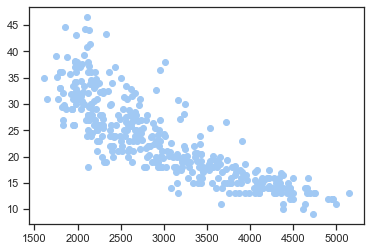

In [35]:
plt.scatter(cars['weight'], cars['mpg'])

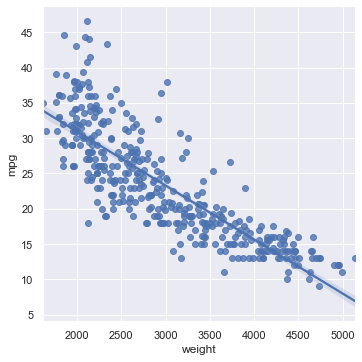

In [8]:
sns.lmplot(x='weight', 'mpg', data=cars)

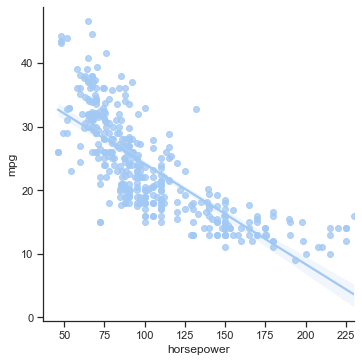

In [33]:
sns.lmplot(x='horsepower', y='mpg', data=cars, x_jitter=.1)

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

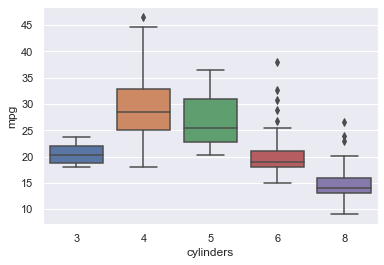

In [12]:
sns.boxplot(x='cylinders', y='mpg', data=cars)

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

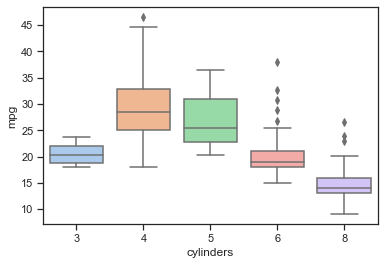

In [13]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='cylinders', y='mpg', data=cars)

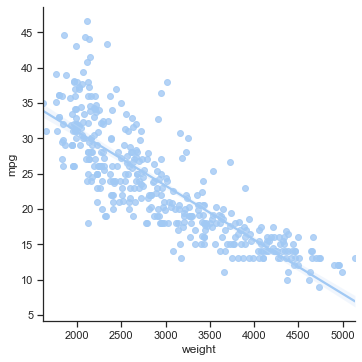

In [32]:
sns.lmplot(x='weight', y='mpg', data=cars, x_jitter=0.1)

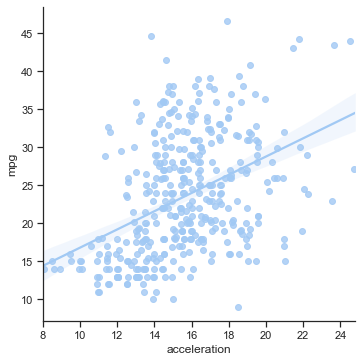

In [31]:
sns.lmplot(x='acceleration', y='mpg', data=cars, x_jitter=.1)

<AxesSubplot:xlabel='model', ylabel='mpg'>

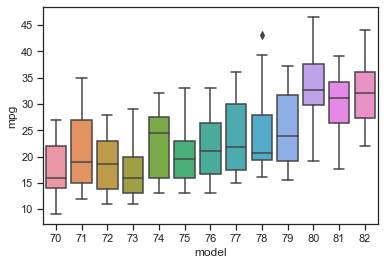

In [17]:
sns.boxplot(x='model', y='mpg', data=cars)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

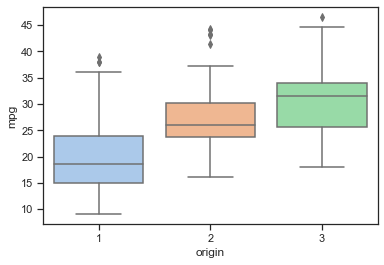

In [18]:
sns.boxplot(x='origin', y='mpg', data=cars)

In [28]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car_name'],
      dtype='object')

### Let's focus on mpg as our target variable that we'd like to model.
### Make conditional plots of all the variables vs mpg

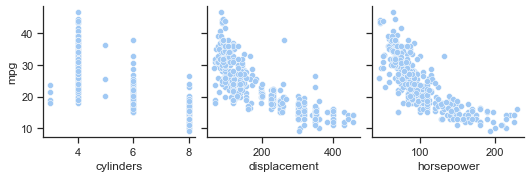

In [26]:
sns.pairplot(
    cars,
    x_vars=['cylinders' , 'displacement' , 'horsepower'],
    y_vars=["mpg"]
)

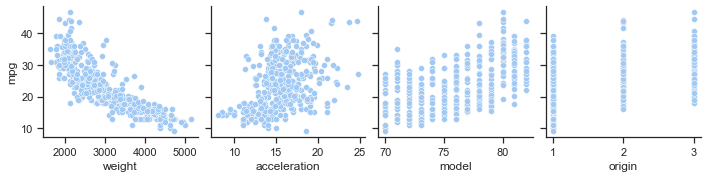

In [30]:
sns.pairplot(
    cars,
    x_vars=['weight' , 'acceleration' , 'model' , 'origin'],
    y_vars=["mpg"]
)

### It's our lucky day, all the variable are either positively or negatively correlated to mpg!

see https://seaborn.pydata.org/api.html for the available plots in seaborn if you are interested.

In [36]:
#recall from cars.ipynb we made models like this to do our linear regressions

formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + model + origin'

model = smf.ols(formula=formula, data=cars)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 24 Jun 2021   Prob (F-statistic):          2.04e-139
Time:                        17:56:57   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
model            0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## We as data analysts know that 'model', 'origin', and 'cylinders' are actually *categorical* variables
## BUT we did not explicitly mark them as such to statsmodels.This is an unsatifactory thing to do. 
## Let's fix this mistake now and see how the linear regression changes.

In [19]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [20]:
cars.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [37]:
formula2 = 'mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + C(model) + C(origin)'

model2 = smf.ols(formula=formula2, data=cars)
fitted_model2 = model2.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     116.8
Date:                Thu, 24 Jun 2021   Prob (F-statistic):          2.64e-151
Time:                        17:58:46   Log-Likelihood:                -954.59
No. Observations:                 392   AIC:                             1955.
Df Residuals:                     369   BIC:                             2047.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.9168      2.361     13.095      0.000      26.274      35.559
C(cylinders)[T.4]     6.9399      1.537      4.516      0.000       3.918       9.962
C(cylinders)[T.5]     6.6377      2.337      2.840      0.005       2.042      11.234
C(cylinders)[T.6]     4.2973      1.706      2.519      0.012       0.943       7.652
C(cylinders)[T.8]     6.3668      1.969      3.234      0.001       2.495      10.238
C(model)[T.71]        0.9104      0.816      1.116      0.265      -0.693       2.514
C(model)[T.72]       -0.4903      0.804     -0.610      0.542      -2.071       1.090
C(model)[T.73]       -0.5529      0.721     -0.766      0.444      -1.972       0.866
C(model)[T.74]        1.2420      0.855      1.453      0.147      -0.439       2.923
C(model)[T.75]        0.8704      0.837      1.039      0.299      -0.776       2.517
C(model)[T.76]        1.4967      0.802      1.866      0.063      -0.080       3.074
C(model)[T.77]        2.9987      0.820      3.657      0.000       1.386       4.611
C(model)[T.78]        2.9738      0.779      3.816      0.000       1.442       4.506
C(model)[T.79]        4.8962      0.825      5.936      0.000       3.274       6.518
C(model)[T.80]        9.0589      0.875     10.351      0.000       7.338      10.780
C(model)[T.81]        6.4582      0.864      7.477      0.000       4.760       8.157
C(model)[T.82]        7.8376      0.849      9.228      0.000       6.167       9.508
C(origin)[T.2]        1.6933      0.516      3.280      0.001       0.678       2.708
C(origin)[T.3]        2.2929      0.497      4.616      0.000       1.316       3.270
displacement          0.0118      0.007      1.745      0.082      -0.001       0.025
horsepower           -0.0392      0.013     -3.010      0.003      -0.065      -0.014
weight               -0.0052      0.001     -8.300      0.000      -0.006      -0.004
acceleration          0.0036      0.087      0.042      0.967      -0.167       0.174
==============================================================================
Omnibus:                       32.560   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.829
Skew:                           0.528   Prob(JB):                     7.53e-13
Kurtosis:                       4.518   Cond. No.                     7.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Note that when you tell statsmodels that something is a categorial variable, it makes multiple dummy variables out of it!
## Why might we want that?
## Why didn't we have to do this with the 'sex' variable from insects.ipynb?

In [38]:
#let's continue our analysis and drop acceleration, since it has p value of 96.7%
formula3 = 'mpg ~ C(cylinders) + displacement + horsepower + weight + C(model) + C(origin)'
model3 = smf.ols(formula=formula3, data=cars)
fitted_model3 = model3.fit()
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     122.6
Date:                Thu, 24 Jun 2021   Prob (F-statistic):          2.36e-152
Time:                        17:59:33   Log-Likelihood:                -954.59
No. Observations:                 392   AIC:                             1953.
Df Residuals:                     370   BIC:                             2041.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.9707      1.970     15.718      0.000      27.096      34.845
C(cylinders)[T.4]     6.9490      1.519      4.575      0.000       3.962       9.936
C(cylinders)[T.5]     6.6467      2.324      2.860      0.004       2.077      11.217
C(cylinders)[T.6]     4.3051      1.693      2.542      0.011       0.975       7.635
C(cylinders)[T.8]     6.3723      1.962      3.249      0.001       2.515      10.230
C(model)[T.71]        0.9057      0.807      1.123      0.262      -0.680       2.492
C(model)[T.72]       -0.4921      0.802     -0.614      0.540      -2.068       1.084
C(model)[T.73]       -0.5551      0.719     -0.772      0.440      -1.968       0.858
C(model)[T.74]        1.2376      0.847      1.461      0.145      -0.428       2.903
C(model)[T.75]        0.8654      0.828      1.046      0.296      -0.762       2.493
C(model)[T.76]        1.4924      0.794      1.879      0.061      -0.069       3.054
C(model)[T.77]        2.9949      0.814      3.681      0.000       1.395       4.595
C(model)[T.78]        2.9703      0.774      3.839      0.000       1.449       4.492
C(model)[T.79]        4.8923      0.818      5.979      0.000       3.283       6.501
C(model)[T.80]        9.0553      0.870     10.414      0.000       7.345      10.765
C(model)[T.81]        6.4527      0.853      7.569      0.000       4.776       8.129
C(model)[T.82]        7.8337      0.843      9.293      0.000       6.176       9.491
C(origin)[T.2]        1.6932      0.516      3.284      0.001       0.679       2.707
C(origin)[T.3]        2.2937      0.496      4.626      0.000       1.319       3.269
displacement          0.0118      0.007      1.754      0.080      -0.001       0.025
horsepower           -0.0396      0.010     -3.781      0.000      -0.060      -0.019
weight               -0.0052      0.001     -9.501      0.000      -0.006      -0.004
==============================================================================
Omnibus:                       32.741   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.270
Skew:                           0.530   Prob(JB):                     6.04e-13
Kurtosis:                       4.524   Cond. No.                     7.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#We shouldn't take out any of the individual dummy variables, so we are pretty much done.

In [14]:
#BONUS How could we incorporate weight^2 in the linear regression model above?